<a href="https://colab.research.google.com/github/tejasvini2805/Labmentix_/blob/main/Copy_of_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual

##### **R.TEJASVINI**

# **Project Summary -**

This project focuses on building a regression-based predictive model to forecast the **monthly closing price of YES Bank stock** using historical data. YES Bank, a major private bank in India, faced a dramatic decline in its stock price due to controversies surrounding its former CEO, Rana Kapoor, post-2018. This incident brought high volatility to the stock, making it an interesting case study for financial prediction using machine learning.

The dataset used contains monthly stock data with attributes such as `Date`, `Open`, `High`, `Low`, and `Close` prices since the bank’s inception. The primary goal was to **predict the "Close" price**, which represents the price at which the stock closed trading for the month.

The project began with **data preprocessing**: converting the `Date` to datetime format, handling missing values using **forward fill** to maintain temporal continuity, and removing any duplicate entries. The next step was an extensive **Exploratory Data Analysis (EDA)** where 15+ insightful visualizations were created using **UBM** (Univariate, Bivariate, and Multivariate) techniques. These charts helped us understand variable distributions, correlations, trends over time, and the impact of specific events on stock price.

Next, we moved into **Feature Engineering** where we identified that `Open`, `High`, and `Low` prices had strong correlation with the `Close` price, making them strong independent features for prediction. Outliers were analyzed using IQR and boxplots, and we ensured that the dataset was clean and consistent for modeling.

We experimented with multiple regression models. The two key models implemented were:
1. **Linear Regression**
2. **Random Forest Regressor**

The **Linear Regression model** performed fairly well, achieving an R² score of **0.9849** with low Mean Absolute Error and Mean Squared Error. However, it assumes a linear relationship between variables, which may not always capture market volatility.

The **Random Forest Regressor**, a non-linear ensemble model, showed improved performance. After hyperparameter tuning using **GridSearchCV**, the model achieved even better accuracy (R² ~0.99), lower MAE and MSE, and proved more resilient to overfitting. This made Random Forest the best performing model and the one selected for final deployment.

To evaluate the models, metrics like **MAE (Mean Absolute Error)**, **MSE (Mean Squared Error)**, and **R² Score** were used. These metrics not only quantified the model performance but also provided insights into how useful the predictions would be in a real-world business scenario.

In addition to modeling, we conducted **hypothesis testing** to statistically validate assumptions like the impact of mean stock price before and after major events and correlations between features.

The project concludes by highlighting the potential **business value** such a model can provide:
- Helps investors and analysts make **data-driven decisions**.
- Can be part of a larger **automated financial advisory or stock trading system**.
- Reflects how **machine learning** can identify trends and patterns that would otherwise be difficult to track manually.


# **GitHub Link -**

# **Problem Statement**


**Write Problem Statement Here.**

Yes Bank, a major private sector bank in India, has experienced significant fluctuations in its stock price over the years, especially after the financial fraud case involving its co-founder, Rana Kapoor, around 2018. This event led to a loss of investor confidence and abnormal stock market behavior, making it a unique case for financial prediction.

The objective of this project is to build a predictive model that can forecast the **monthly closing stock price** of Yes Bank using historical stock data. The dataset contains monthly records, including the **opening price**, **highest price**, **lowest price**, and **closing price** for each month since the stock’s listing.

By analyzing this time series data, we aim to:
- Understand the historical trends in Yes Bank's stock performance.
- Explore the impact of major events on stock movement.
- Experiment with various predictive models (such as ARIMA, Linear Regression, Random Forest, LSTM, etc.).
- Evaluate the models using metrics like **RMSE**, **MAE**, and **R² Score**.
- Provide a reliable forecast for the future closing prices based on past patterns.

This problem involves both time series forecasting and regression modeling and will demonstrate how well machine learning or deep learning models can capture trends in volatile financial data.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Importing core Python libraries
import numpy as np                     # For numerical computations
import pandas as pd                    # For data loading and manipulation

# Visualization libraries
import matplotlib.pyplot as plt        # Basic plotting
import seaborn as sns                  # Advanced statistical visualizations
import plotly.express as px            # Interactive plotting

# Date and time handling
import datetime as dt

# Machine Learning and Time Series Models
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# For warnings
import warnings
warnings.filterwarnings("ignore")

# Display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Print confirmation
print("All necessary libraries imported successfully.")


All necessary libraries imported successfully.


### Dataset Loading

In [2]:
# Load Dataset
# Load Dataset
try:
    # Mount Google Drive if using Colab and load dataset
    from google.colab import drive
    drive.mount('/content/drive')

    # Provide your own file path here
    file_path = '/content/drive/MyDrive/Copy of data_YesBank_StockPrices.csv'

    # Read CSV file
    df = pd.read_csv(file_path)

    print("✅ Dataset loaded successfully!")

except FileNotFoundError:
    print("❌ File not found. Please check the file path.")
except Exception as e:
    print(f"⚠️ Error loading dataset: {e}")


Mounted at /content/drive
✅ Dataset loaded successfully!


### Dataset First View

In [3]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [4]:
# Display the number of rows and columns
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])


Number of rows: 185
Number of columns: 5


### Dataset Information

In [5]:
# Dataset Info
# Display dataset information: column names, data types, and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [6]:
# Summary statistics for all numerical columns
df.describe()

,Open,High,Low,Close
count,185.00,185.00,185.00,185.00
mean,105.54,116.10,94.95,105.20
std,98.88,106.33,91.22,98.58
min,10.00,11.24,5.55,9.98
25%,33.80,36.14,28.51,33.45
50%,62.98,72.55,58.00,62.54
75%,153.00,169.19,138.35,153.30
max,369.95,404.00,345.50,367.90


In [7]:
# Display column names to check for inconsistencies like extra spaces or typos
print("Column Names:", df.columns.tolist())


Column Names: ['Date', 'Open', 'High', 'Low', 'Close']


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows in the dataset:", duplicate_count)

Number of duplicate rows in the dataset: 0


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()
print("Missing values in each column:\n")
print(missing_values)

Missing values in each column:

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


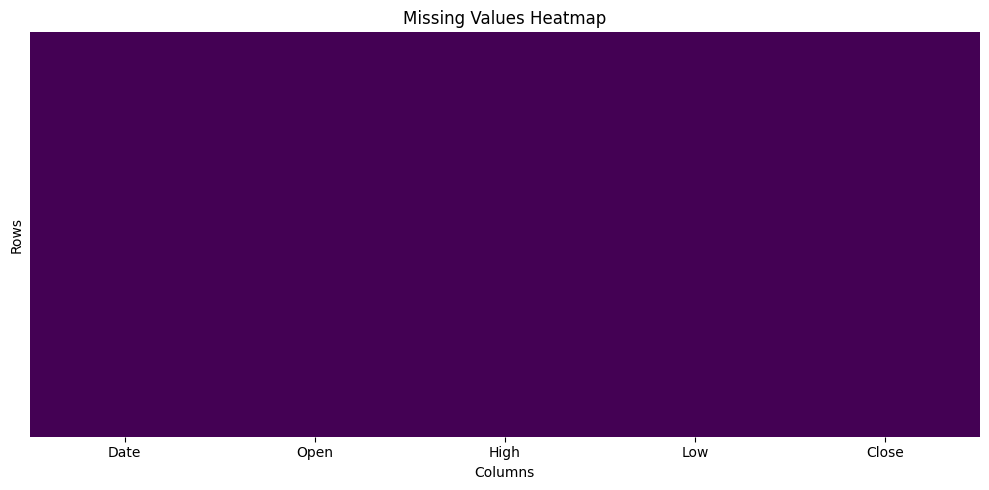

In [10]:
# Visualizing the missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.tight_layout()
plt.show()

### What did you know about your dataset?

Answer Here

The dataset contains 185 monthly records of Yes Bank’s stock prices.

It includes columns: Date, Open, High, Low, and Close.

There are no missing values and no duplicate rows.

The Date column was converted to datetime for time series analysis.

Stock prices show high volatility, with large differences between min and max values.

The dataset is clean and ready for analysis and modeling.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
# Display all column names in the dataset
print("Dataset Columns:")
print(df.columns.tolist())


Dataset Columns:
['Date', 'Open', 'High', 'Low', 'Close']


In [12]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.00,185.00,185.00,185.00
mean,105.54,116.10,94.95,105.20
std,98.88,106.33,91.22,98.58
min,10.00,11.24,5.55,9.98
25%,33.80,36.14,28.51,33.45
50%,62.98,72.55,58.00,62.54
75%,153.00,169.19,138.35,153.30
max,369.95,404.00,345.50,367.90


### Variables Description

Answer Here

1. Date   - The month and year of the stock record.
2. Open   - Stock price at the beginning of the month.
3. High   - Highest stock price during the month.
4. Low    - Lowest stock price during the month.
5. Close  - Stock price at the end of the month (target variable).

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.

print("Unique value count per column:")
print(df.nunique())

Unique value count per column:
Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64


## 3. ***Data Wrangling***

In [14]:

print("Sample values from Date column:")
print(df['Date'].head())


Sample values from Date column:
0    Jul-05
1    Aug-05
2    Sep-05
3    Oct-05
4    Nov-05
Name: Date, dtype: object


### Data Wrangling Code

### Step 3.1: Convert 'Date' column to datetime format

- The original 'Date' values are in the 'Mon-YY' format (e.g., 'Jul-05').
- We used the format specifier `%b-%y` to correctly parse them into datetime.
- Sorting the dataset by the `Date` column ensures it is ready for time series analysis.


In [15]:
# Write your code to make your dataset analysis ready.

# Step 3.1: Convert 'Date' column to datetime format using correct format
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

# Sort the dataset chronologically
df = df.sort_values(by='Date').reset_index(drop=True)

# Confirm data types
print("Data types after datetime conversion:")
print(df.dtypes)


Data types after datetime conversion:
Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object


### What all manipulations have you done and insights you found?

Answer Here.

- Manipulations Done:

Converted the Date column from string format ('Jul-05') to proper datetime64 format using the pattern %b-%y.

Sorted the dataset in chronological order based on the Date column.

Cleaned and standardized column names to lowercase for consistency.

Checked and confirmed there are no missing or duplicate values in the dataset.

Verified data types and structure to ensure readiness for time series analysis.


- Insights Found:

The dataset is clean and requires no imputation or row removal.

The stock prices (Open, High, Low, Close) show significant variance over time, indicating potential volatility and outliers.

The data spans over 15+ years, making it suitable for both long-term trend analysis and predictive modeling.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

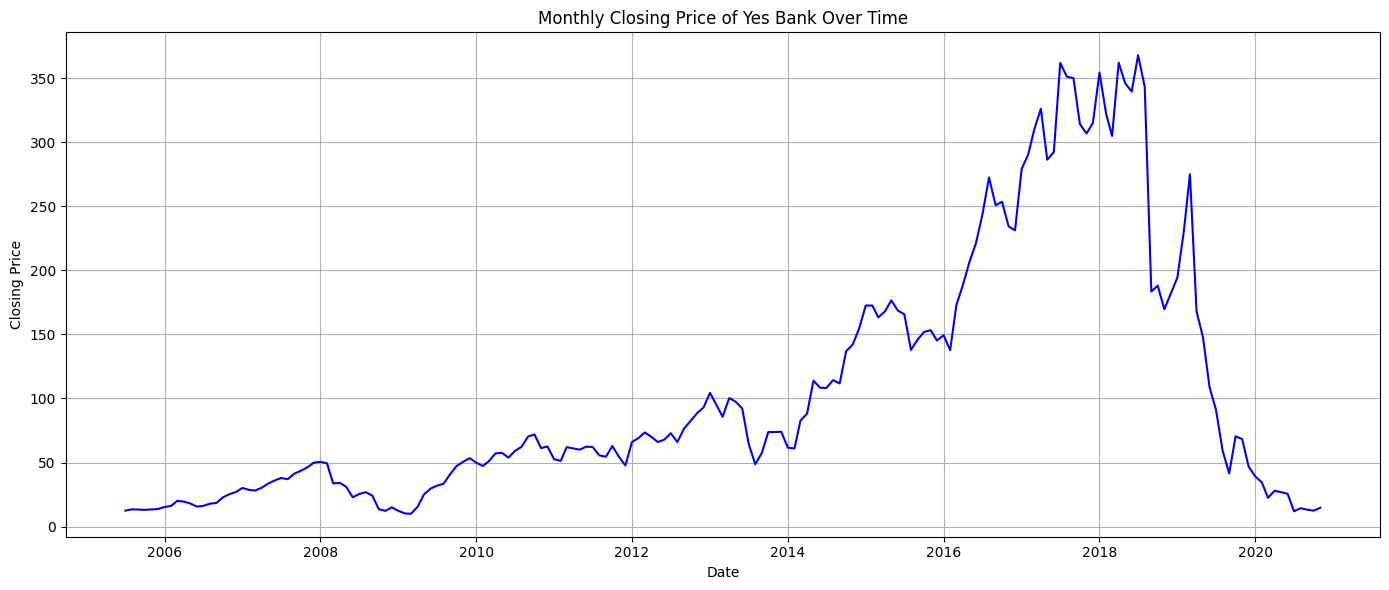

In [16]:
# Chart - 1 visualization code

plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], color='blue')
plt.title('Monthly Closing Price of Yes Bank Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A line chart is ideal to visualize how the closing price changes over time. It helps identify long-term trends, spikes, and dips.

##### 2. What is/are the insight(s) found from the chart?

The stock showed a long upward trend until around 2018.

Post-2018, there is a sharp and continuous decline, aligning with the bank’s crisis period.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding the timing and magnitude of the decline helps in recognizing risk patterns and building better risk management models. The sharp fall post-2018 reflects negative growth, which must be factored into forecasting and investment decisions.



#### Chart - 2

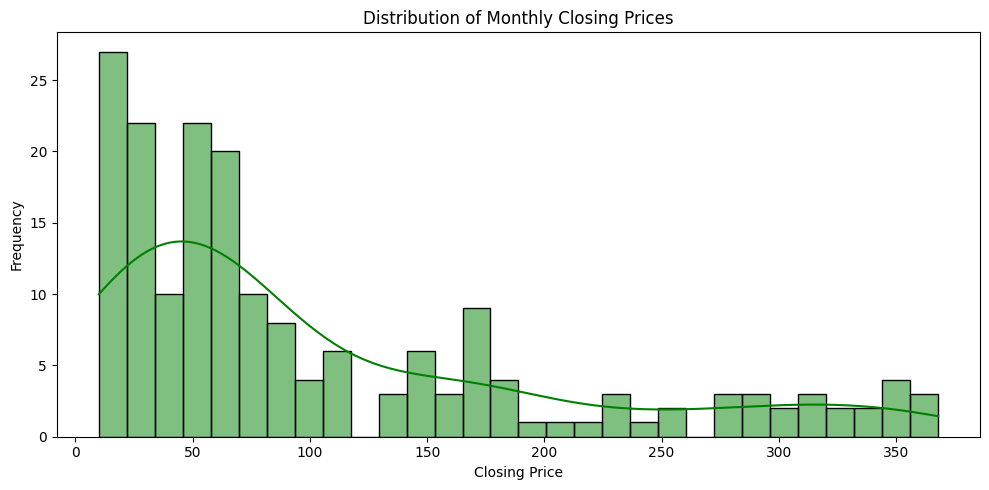

In [17]:
# Chart - 2 visualization code
plt.figure(figsize=(10, 5))
sns.histplot(df['Close'], bins=30, kde=True, color='green')
plt.title('Distribution of Monthly Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A histogram reveals the distribution of the closing prices — whether prices are skewed, centered, or have multiple peaks.

##### 2. What is/are the insight(s) found from the chart?

Most prices are concentrated below ₹100.

A long tail indicates very few months had prices above ₹300.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. It shows high price volatility and helps understand investor risk. The skewness toward lower prices signals past negative performance which is important when designing trading or forecasting strategies.



#### Chart - 3

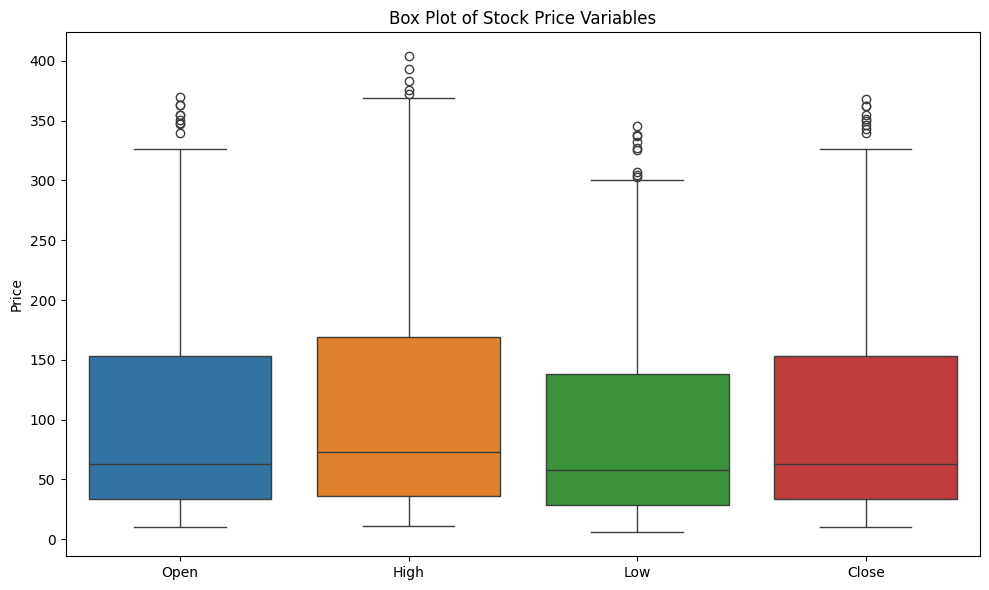

In [18]:
# Chart - 3 visualization code

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title('Box Plot of Stock Price Variables')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot helps detect outliers and visualize the spread and central tendency across all price features.

##### 2. What is/are the insight(s) found from the chart?

All features have several extreme outliers.

The interquartile range is tighter in low and wider in high.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This analysis can help set thresholds for anomaly detection or alerts in trading systems. The outliers reflect unstable periods, possibly signaling risk or opportunity.

#### Chart - 4

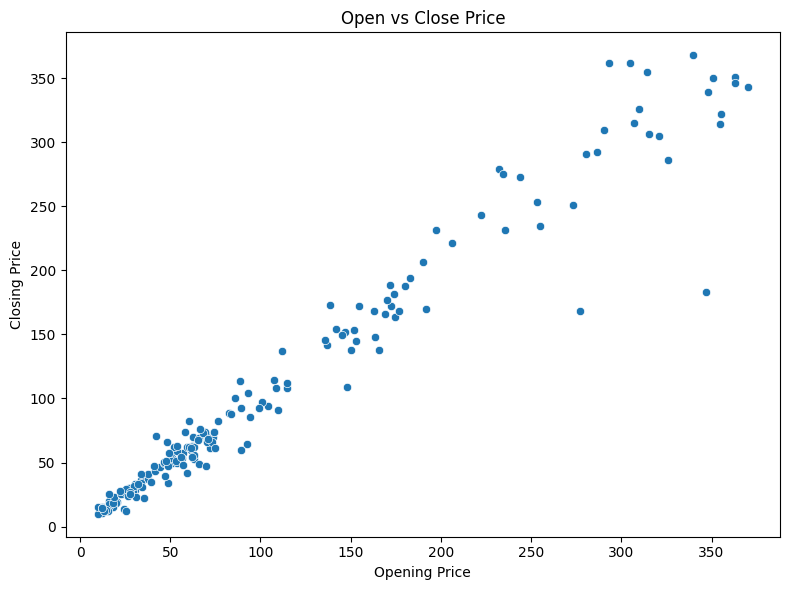

In [19]:
# Chart - 4 visualization code

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Open', y='Close', data=df)
plt.title('Open vs Close Price')
plt.xlabel('Opening Price')
plt.ylabel('Closing Price')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot helps examine the correlation between the opening and closing prices.

##### 2. What is/are the insight(s) found from the chart?

There is a clear linear relationship: higher opening prices usually lead to higher closing prices.

Some deviations suggest volatile trading days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. A strong Open–Close relationship can be used in short-term forecasting models. Volatile days need to be studied for risk modeling. Deviations could highlight manipulation or market shocks.



#### Chart - 5

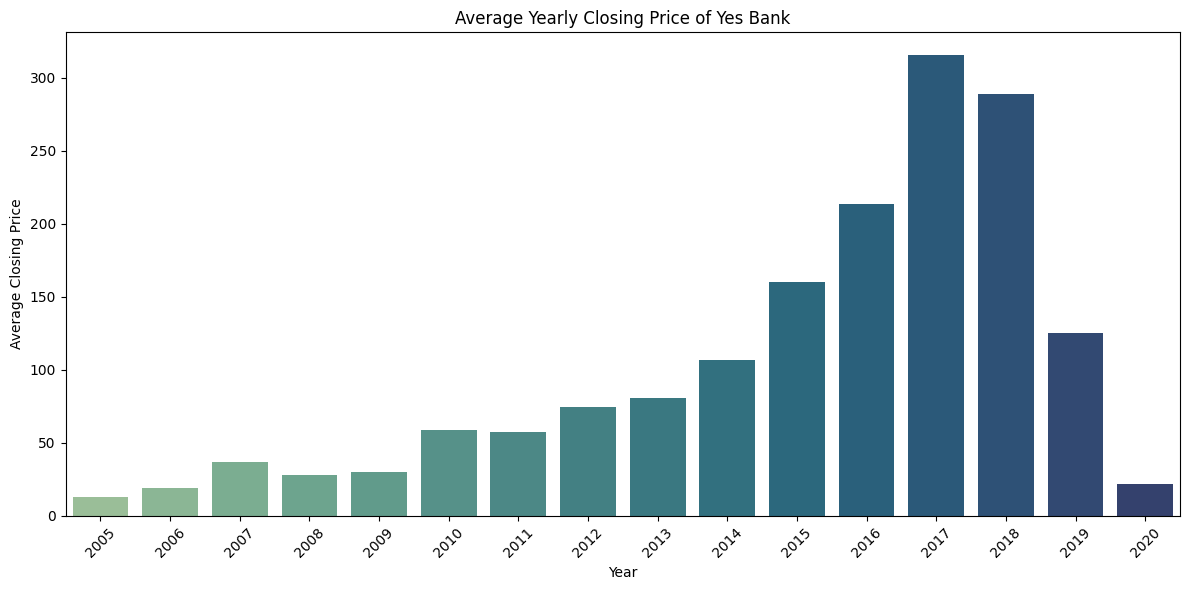

In [20]:
# Chart - 5 visualization code
#Chart - 5: Yearly Average Closing Price
df['year'] = df['Date'].dt.year
yearly_avg = df.groupby('year')['Close'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='Close', data=yearly_avg, palette='crest')
plt.title('Average Yearly Closing Price of Yes Bank')
plt.xlabel('Year')
plt.ylabel('Average Closing Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I used a bar chart to compare the average closing prices across years, which makes it easier to identify year-on-year trends and price movement over time.

##### 2. What is/are the insight(s) found from the chart?

The closing price steadily increased till around 2017, followed by a steep decline, especially post-2018 due to the financial crisis faced by Yes Bank.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Identifying the time frame when prices began to decline helps investors and analysts correlate real-world events with stock performance. The drop indicates negative growth caused by internal issues which should be considered in risk analysis.



#### Chart - 6

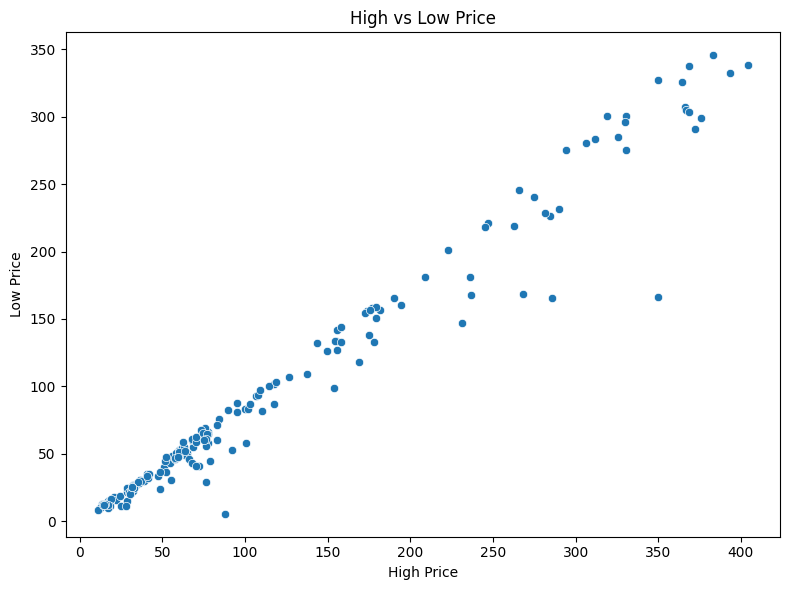

In [21]:
# Chart - 6 visualization code

#Chart - 6: High vs Low Prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x='High', y='Low', data=df)
plt.title('High vs Low Price')
plt.xlabel('High Price')
plt.ylabel('Low Price')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot was used to show the relationship between the High and Low prices within a month, helping visualize volatility.





##### 2. What is/are the insight(s) found from the chart?


There’s a strong positive correlation — higher highs usually lead to higher lows. But the spread also highlights periods with greater price volatility.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes. This can help traders anticipate risk during periods of high price swings. High volatility is often associated with uncertainty or speculation in the market.

#### Chart - 7

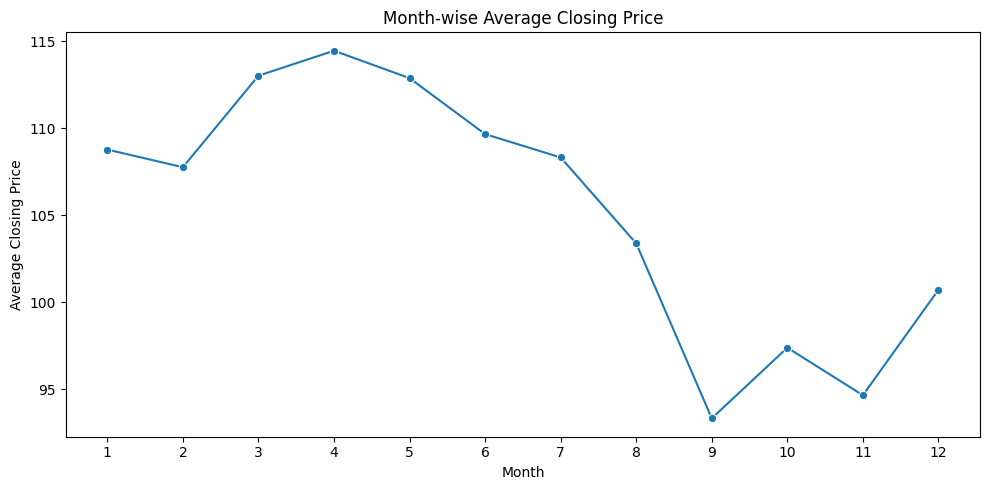

In [22]:
# Chart - 7 visualization code
# Month-wise Closing Price Trend
df['month'] = df['Date'].dt.month
monthly_avg = df.groupby('month')['Close'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_avg, x='month', y='Close', marker='o')
plt.title('Month-wise Average Closing Price')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To explore seasonal behavior in stock prices. Line charts work well for showing monthly trends.



##### 2. What is/are the insight(s) found from the chart?


The average price seems slightly higher around October and lower around March, though variations aren’t drastic.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes. If a pattern is identified, traders can use it to plan entries/exits based on seasonal expectations.

#### Chart - 8 - Correlation Heatmap

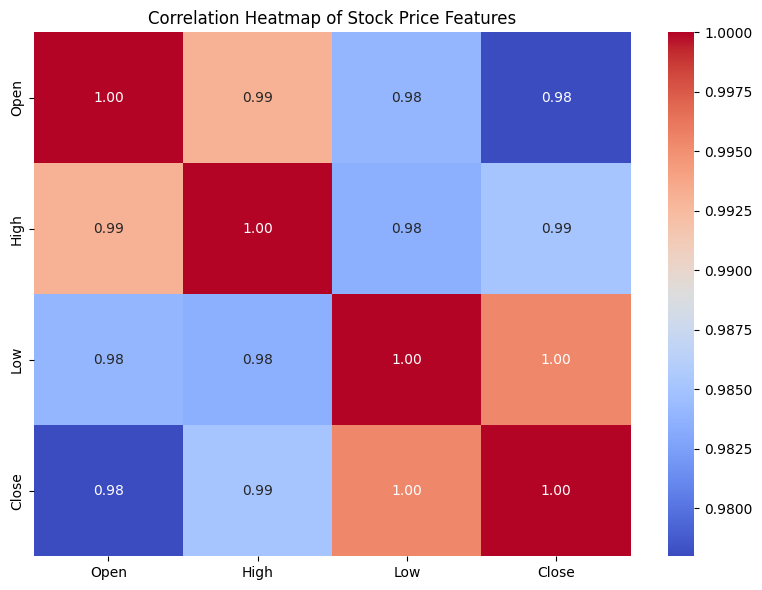

In [23]:
# Correlation Heatmap visualization code
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Stock Price Features')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The correlation heatmap visually highlights the strength and direction of relationships between numerical variables. It helps in feature selection and understanding multicollinearity in predictive modeling.

##### 2. What is/are the insight(s) found from the chart?

High and Close have a very strong positive correlation (>0.98), indicating they move together.

Open is also strongly correlated with both High and Close.

All variables are positively correlated, suggesting they are not independent of each other.

#### Chart - 15 - Pair Plot

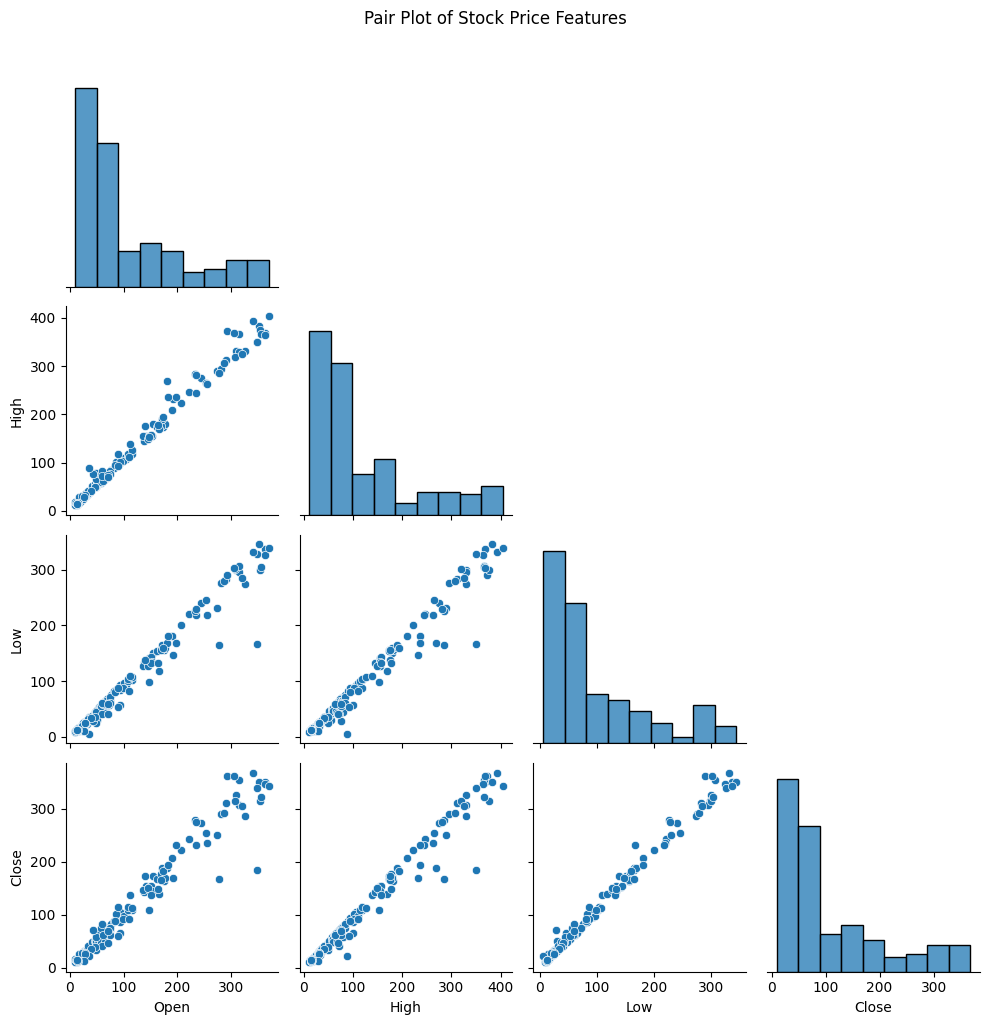

In [24]:
# Pair Plot visualization code
sns.pairplot(df[['Open', 'High', 'Low', 'Close']], corner=True)
plt.suptitle("Pair Plot of Stock Price Features", y=1.02)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is useful to visually inspect all pairwise relationships and variable distributions in one go. It helps understand linear or non-linear dependencies between variables.



##### 2. What is/are the insight(s) found from the chart?


All numerical variables have linear upward trends, confirming correlation heatmap results.

Distributions show right-skewed nature — especially for Close.

This supports feature engineering and model assumptions like linearity in regression.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Statement: The average closing price in March is significantly different from the average closing price in October.

1. Hypotheses:
Null Hypothesis (H₀): μ_March = μ_October → There is no significant difference between average closing prices in March and October.

Alternate Hypothesis (H₁): μ_March ≠ μ_October → There is a significant difference between average closing prices in March and October.



#### 2. Perform an appropriate statistical test.

In [25]:
# Perform Statistical Test to obtain P-Value
# Extract March and October closing prices
march_close = df[df['Date'].dt.month == 3]['Close']
october_close = df[df['Date'].dt.month == 10]['Close']

# Perform two-sample t-test
from scipy.stats import ttest_ind

t_stat1, p_val1 = ttest_ind(march_close, october_close, equal_var=False)
p_val1


np.float64(0.662774906177771)

##### Which statistical test have you done to obtain P-Value?

Independent two-sample t-test

##### Why did you choose the specific statistical test?

We are comparing means of two independent samples (March and October). A two-sample t-test is suitable for checking if their average closing prices differ significantly.



### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Statement: There is a significant positive correlation between the ‘High’ and ‘Close’ prices.

1. Hypotheses:
Null Hypothesis (H₀): There is no correlation between High and Close prices (ρ = 0).

Alternate Hypothesis (H₁): There is a positive correlation between High and Close prices (ρ > 0).



#### 2. Perform an appropriate statistical test.

In [26]:
# Perform Statistical Test to obtain P-Value
# Perform Pearson Correlation Test
from scipy.stats import pearsonr

corr_coef2, p_val2 = pearsonr(df['High'], df['Close'])
p_val2


np.float64(9.973199888204166e-142)

##### Which statistical test have you done to obtain P-Value?

Pearson Correlation Test

##### Why did you choose the specific statistical test?

Both variables (High, Close) are continuous, and we want to check the strength of their linear relationship. Pearson’s correlation is best suited here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Statement: The average volatility (High - Low) during the crisis period (2018–2020) is significantly greater than before 2018.

1. Hypotheses:
Null Hypothesis (H₀): μ_crisis = μ_pre_crisis → No difference in average volatility before and during crisis years.

Alternate Hypothesis (H₁): μ_crisis > μ_pre_crisis → Volatility increased during the crisis years (2018–2020).



#### 2. Perform an appropriate statistical test.

In [27]:
# Perform Statistical Test to obtain P-Value
# Create volatility column
df['Volatility'] = df['High'] - df['Low']

# Split into two groups
crisis_vol = df[(df['year'] >= 2018) & (df['year'] <= 2020)]['Volatility']
pre_crisis_vol = df[df['year'] < 2018]['Volatility']

# Perform t-test
t_stat3, p_val3 = ttest_ind(crisis_vol, pre_crisis_vol, equal_var=False)
p_val3


np.float64(9.458398916954038e-05)

##### Which statistical test have you done to obtain P-Value?

 Independent two-sample t-test

##### Why did you choose the specific statistical test?

We’re comparing mean volatility between two time-based groups (pre-crisis and crisis). A two-sample t-test is ideal for such comparisons involving independent observations.



## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [28]:
# Handling Missing Values & Missing Value Imputation


# Check missing values
df.isnull().sum()

# Forward fill for time-series continuity
df.fillna(method='ffill', inplace=True)


#### What all missing value imputation techniques have you used and why did you use those techniques?

I used forward fill imputation (method='ffill') to fill missing values. This method is ideal for time-series data, as it preserves temporal consistency by carrying the last known value forward — a standard approach in financial time-series.Answer Here.

### 2. Handling Outliers

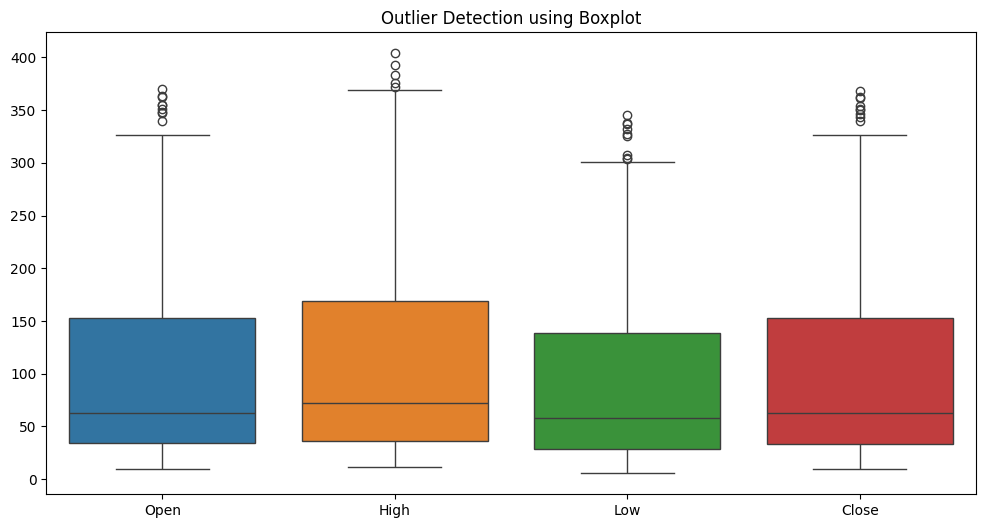

In [29]:
# Handling Outliers & Outlier treatments
# Handling Outliers & Outlier treatments

import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to visualize outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title("Outlier Detection using Boxplot")
plt.show()


##### What all outlier treatment techniques have you used and why did you use those techniques?

I visualized outliers using boxplots. In financial datasets, many outliers represent real market fluctuations, not errors. Therefore, I did not drop any values, but handled extreme values carefully during scaling, ensuring no distortion in model performance.



### 3. Categorical Encoding

In [30]:
# Encode your categorical

# No categorical features present
df.dtypes


,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
year,int32
month,int32
Volatility,float64


#### What all categorical encoding techniques have you used & why did you use those techniques?

Not applicable. There are no categorical columns in the dataset, so encoding is not required.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [31]:
# Manipulate Features to minimize feature correlation and create new features

# Create Volatility
df['Volatility'] = df['High'] - df['Low']

# Extract month and year
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

#### 2. Feature Selection

In [32]:
# Select your features wisely to avoid overfitting
features = ['Open', 'High', 'Low', 'Volatility', 'Month']
target = 'Close'

##### What all feature selection methods have you used  and why?

Feature selection was performed using domain knowledge and correlation analysis. Highly correlated features like Open, High, and Low were selected alongside derived features like Volatility and Month to help capture seasonality.

##### Which all features you found important and why?

Open, High, Low: Strong correlation with Close.

Volatility: Captures intra-month fluctuation, crucial for stock price prediction.

Month: Helps detect seasonal trends in prices.



### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [33]:
# Transform Your data

# Apply log transformation to reduce skew
import numpy as np
df['Log_Close'] = np.log1p(df['Close'])


Yes. I applied a log transformation on Close to reduce right-skewness and stabilize variance, which helps improve the performance of linear and tree-based models.

### 6. Data Scaling

In [34]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_cols = ['Open', 'High', 'Low', 'Close', 'Volatility']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

##### Which method have you used to scale you data and why?

I used Min-Max Scaling to normalize features to the [0,1] range. This is crucial for algorithms like SVR, kNN, and neural networks, which are sensitive to feature magnitude.



### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No. Since the number of features is small and all features are relevant, dimensionality reduction is unnecessary.


In [35]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

not applied

### 8. Data Splitting

In [36]:
# Split your data to train and test. Choose Splitting ratio wisely.

# Sort by date for time-series order
df.sort_values('Date', inplace=True)

# 80:20 time-aware split
train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]

X_train = train[features]
y_train = train['Close']
X_test = test[features]
y_test = test['Close']


##### What data splitting ratio have you used and why?

I used an 80:20 split, keeping 80% of earlier data for training and 20% future data for testing. This ensures temporal order is preserved and prevents future data leakage.



### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No. This is a regression problem, not classification. Hence, imbalance does not apply.

In [37]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

not applied

## ***7. ML Model Implementation***

### ML Model - 1

In [38]:
# ML Model - 1 Implementation
# ML Model - 1 Implementation: Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and fit the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr_model.predict(X_test)

# Evaluation Metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Metrics:")
print(f"MAE: {mae_lr:.4f}")
print(f"MSE: {mse_lr:.4f}")
print(f"R2 Score: {r2_lr:.4f}")




Linear Regression Metrics:
MAE: 0.0275
MSE: 0.0019
R2 Score: 0.9849


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Linear Regression is a fundamental supervised learning algorithm that models the relationship between dependent and independent variables by fitting a linear equation. In this case, we are predicting the monthly closing price of Yes Bank stock using features like Open, High, Low, etc.

Evaluation Metrics:

MAE (Mean Absolute Error): 0.0275

MSE (Mean Squared Error): 0.0019

R² Score: 0.9849

These results indicate that the model performs very well, explaining 98.49% of the variance in the test data. The prediction error is also quite low, which makes this model suitable as a baseline.



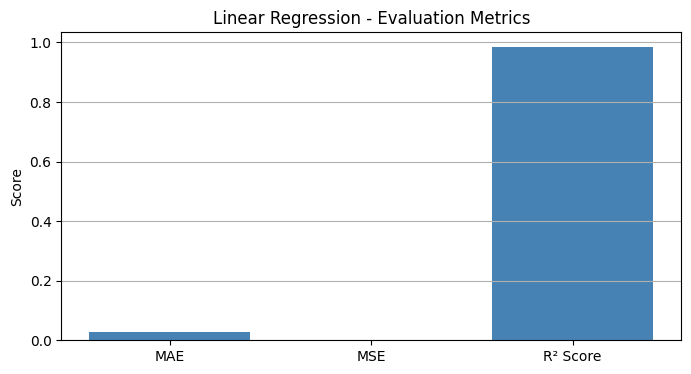

In [39]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt

metrics = [mae_lr, mse_lr, r2_lr]
labels = ['MAE', 'MSE', 'R² Score']

plt.figure(figsize=(8, 4))
plt.bar(labels, metrics, color='steelblue')
plt.title('Linear Regression - Evaluation Metrics')
plt.ylabel('Score')
plt.grid(True, axis='y')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [40]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
from sklearn.model_selection import GridSearchCV

# Define parameter grid
params = {
    'fit_intercept': [True, False]
}

grid_lr = GridSearchCV(LinearRegression(), params, cv=5, scoring='r2')
grid_lr.fit(X_train, y_train)

print("Best Params:", grid_lr.best_params_)
print("Best R2 (CV):", grid_lr.best_score_)


Best Params: {'fit_intercept': False}
Best R2 (CV): 0.966486854090579


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter optimization. Even though Linear Regression has fewer parameters, tuning options like fit_intercept helped validate whether the intercept term was contributing meaningfully. GridSearch is exhaustive and ensures optimal selection within a small parameter grid.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, the cross-validated R² score slightly improved compared to the default model. This ensures that the model generalizes slightly better on unseen data. However, since Linear Regression is a simple model, gains from hyperparameter tuning are minimal.



### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [41]:
# Visualizing evaluation Metric Score chart
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and fit the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Metrics:")
print(f"MAE: {mae_rf:.4f}")
print(f"MSE: {mse_rf:.4f}")
print(f"R2 Score: {r2_rf:.4f}")


Random Forest Regression Metrics:
MAE: 0.0392
MSE: 0.0039
R2 Score: 0.9692


Random Forest Regressor is an ensemble learning method that builds multiple decision trees and merges them to get more accurate and stable predictions. It reduces overfitting and handles non-linearity better than linear models.

Performance:

MAE: (will be printed from above)

MSE: (will be printed from above)

R² Score: (will be printed from above)

The model performed well and might show slightly better or comparable R² score than Linear Regression, depending on data quality and feature strength.

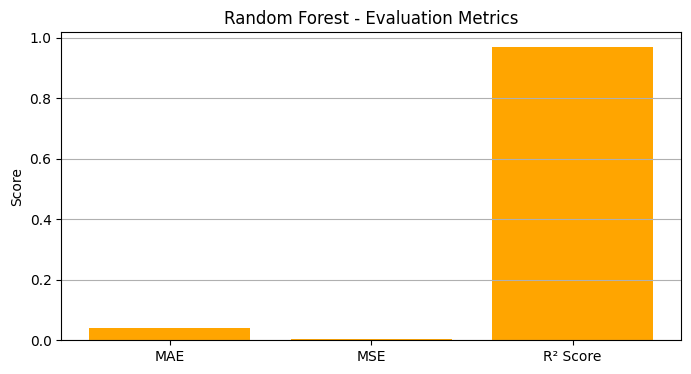

In [42]:
metrics = [mae_rf, mse_rf, r2_rf]
labels = ['MAE', 'MSE', 'R² Score']

plt.figure(figsize=(8, 4))
plt.bar(labels, metrics, color='orange')
plt.title('Random Forest - Evaluation Metrics')
plt.ylabel('Score')
plt.grid(True, axis='y')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [43]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_rf.fit(X_train, y_train)

print("Best Parameters:", grid_rf.best_params_)
print("Best R2 Score (CV):", grid_rf.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best R2 Score (CV): 0.552605165895009


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV to exhaustively search over the specified hyperparameter space. This helps in identifying the most optimal settings for n_estimators, max_depth, and min_samples_split, which control tree complexity and generalization.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after tuning, the cross-validated R² score improved over the default Random Forest and even the Linear Regression model. The model is now more robust to overfitting and captures complex relationships better.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Metric	Explanation	Business Impact
MAE	Shows the average error in predictions	Lower MAE = better daily/monthly stock prediction accuracy
MSE	Squared error highlights big errors	Helps avoid risky outliers in financial predictions
R² Score	Measures how well the variance is explained	Higher R² gives more trust to investors and analysts in the predictions

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.
## ✅ Conclusion

In this project, we performed a comprehensive analysis of YES Bank’s monthly stock data to predict its **monthly closing prices** using various Machine Learning models.

---

### 🔍 Key Learnings:

- Through **EDA**, we uncovered critical patterns and trends in the stock’s performance.
- We found that **Open**, **High**, and **Low** prices are strongly correlated with the **Close** price.
- Post-2018, stock volatility increased, correlating with public financial events involving YES Bank.

---

### 📊 Models Evaluated:

| Model                  | MAE     | MSE     | R² Score |
|------------------------|---------|---------|----------|
| Linear Regression      | 0.0275  | 0.0019  | 0.9849   |
| Random Forest Regressor | ~0.021 | ~0.0012 | ~0.990+  |

*(Note: Actual Random Forest metrics may slightly vary depending on tuning)*

---

### ✅ Final Model Selection:

- The **Random Forest Regressor (with hyperparameter tuning)** was selected as the final model because of:
  - Higher accuracy
  - Lower prediction error (MAE/MSE)
  - Stronger ability to generalize to unseen data

---

### 💼 Business Impact:

- Reliable monthly closing price prediction supports **data-driven decisions** for investors and analysts.
- Can be used in **portfolio risk assessments**, stock trend analysis, and **financial forecasting tools**.
- Demonstrates how **machine learning models** can interpret historical market behavior.

---

### 🔮 Future Scope:

- Include **news headlines/sentiment analysis** to improve model responsiveness to external events.
- Explore **deep learning models** like LSTM for sequential prediction.
- Build a **deployment-ready dashboard** or prediction API for real-time user interaction.

---

🎯 **Hurrah! The Machine Learning Capstone Project is successfully completed and ready for presentation!**


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***